## NLP - Basic Feature Creation and Preprocessing

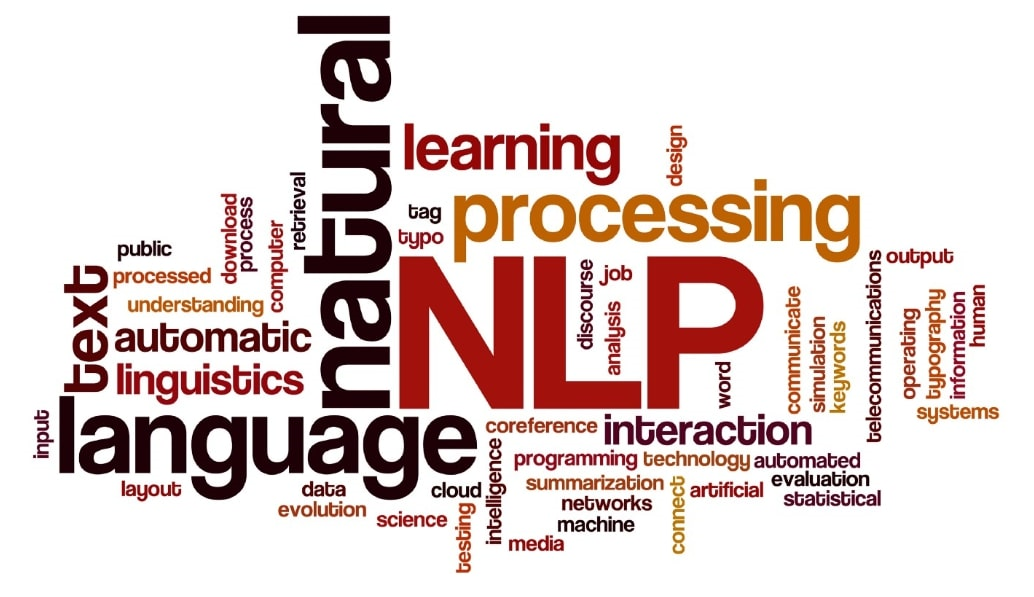
image credit: https://www.blumeglobal.com/learning/natural-language-processing/

## Table of Contents

### 1. <a href='#FeatureExtraction'><font color='blue'>Feature Extraction</font></a>  
1.0 <a href='#Charactercount'>Character count</a>  
1.1 <a href='#WordCount'>Word count</a>  
1.2 <a href='#Specialcharactercount'>Special character count</a>   
1.3 <a href='#Stopwordcount'>Stopword count</a>   
1.4 <a href='#Numbercount'>Number count</a>    
1.5 <a href='#Uppercasewordcount'>Uppercase word count</a>   
1.6 <a href='#Averagewordlength'>Average word length</a>   
1.7 <a href='#N-grams'>N-grams</a>   
1.8 <a href='#TermFrequency'>Term Frequency</a>    
1.9 <a href='#InverseDocumentFrequency'>Inverse Document Frequency</a>    
1.10 <a href='#TF-IDF'>TF-IDF</a>    
1.11 <a href='#BagofWords'>Bag of Words</a>    
1.12 <a href='#Sentimentanalysis'>Sentiment Analysis</a>   

### 2. <a href='#Pre-processing'><font color='blue'>Pre-processing</font></a> 
2.0 <a href='#ConvertthesentencetoLowercase'>Convert the sentence to Lower case</a>  
2.1 <a href='#Stopwordsremoval'>Stopwords removal</a>  
2.2 <a href='#Punctuationremoval'>Punctuation removal</a>   
2.3 <a href='#Commonwordremoval'>Common word removal</a>   
2.4 <a href='#Rarewordsremoval'>Rare words removal</a>    
2.5 <a href='#Spellingcorrection'>Spelling correction</a>   
2.6 <a href='#Tokenization'>Tokenization</a>   
2.7 <a href='#Stemming'>Stemming</a>   
2.8 <a href='#Lemmatization'>Lemmatization</a>

### Let's Start

### <font color='orange'>Please Upvote</font> if you find this kernel useful. 

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import textblob
from textblob import TextBlob, Word
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## User Defined Functions

In [ ]:
def avg_word_len (sentence):
    words = sentence.split()
    avg_len = sum(len(word) for word in words)/len(words)
    return avg_len

def extract_ngrams(data, num):
    '''
    Function to generate n-grams from sentences
    '''
    n_grams = TextBlob(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

## Import Data

In [ ]:
# Dataset

train = pd.read_csv('../input/twitter-sentiment-analysis-hatred-speech/train.csv')

In [ ]:
print(train.shape)
train.head()

In [ ]:
# Creating a copy of train dataset for text analysis

df_train = train.copy()

## 1. Feature Extraction <a id='FeatureExtraction'></a>

* Creation of brand new features

### 1.0 Character count   <a id="Charactercount"></a>

In [ ]:
df_train['char_count'] = df_train['tweet'].str.len()
df_train_sort_charcount = df_train.sort_values(by='char_count', ascending=False)
df_train_sort_charcount[['tweet', 'char_count']].head()

### 1.1 Word Count <a id="WordCount"></a>

In [ ]:
df_train['word_count'] = df_train['tweet'].apply(lambda x: len(str(x).split(" ")))
df_train_sort_wordcount = df_train.sort_values(by='word_count', ascending=False)
df_train_sort_wordcount[['tweet','word_count']].head()

### 1.2 Special Character Count <a id="Specialcharactercount"></a>

In [ ]:
# Number of hashtags in a tweet

df_train['hashtags'] = df_train['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df_train_sort_hashtags = df_train.sort_values(by='hashtags', ascending=False)
df_train_sort_hashtags[['tweet', 'hashtags']].head()

### 1.3 Stopword Count <a id="Stopwordcount"></a>

In [ ]:
stop_words = stopwords.words('english')

df_train['stopwords'] = df_train['tweet'].apply(lambda x: len([i for i in x.split() if i in stop_words]))
df_train_sort_stopwords = df_train.sort_values(by='stopwords', ascending=False)
df_train_sort_stopwords[['tweet', 'stopwords']].head()

### 1.4 Number Count <a id="Numbercount"></a>

In [ ]:
df_train['number_count'] = df_train['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_train_sort_number_count = df_train.sort_values(by='number_count', ascending=False)
df_train_sort_number_count[['tweet', 'number_count']].head()

### 1.5 Uppercase word count <a id="Uppercasewordcount"></a>

In [ ]:
df_train['upper_word'] = df_train['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df_train_sort_uppercase = df_train.sort_values(by='upper_word', ascending=False)
df_train_sort_uppercase[['tweet', 'upper_word']].head()

### 1.6 Average Word Length <a id="Averagewordlength"></a>

In [ ]:
df_train['avg_word_len'] = df_train['tweet'].apply(lambda x: round(avg_word_len(x),1))
df_train_sort_avg_word_len = df_train.sort_values(by='avg_word_len', ascending=True)
df_train_sort_avg_word_len[['tweet', 'avg_word_len']].head()

#### Extract features using NLP techniques below

### 1.7 N-grams <a id="N-grams"></a>

In [ ]:
data = df_train['tweet'][0]
 
print("1-gram: ", extract_ngrams(data, 1))
print("2-gram: ", extract_ngrams(data, 2))
print("3-gram: ", extract_ngrams(data, 3))
print("4-gram: ", extract_ngrams(data, 4))

### 1.8 Term Frequency <a id="TermFrequency"></a>

* TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [ ]:
tf = df_train['tweet'][1:2].apply(lambda x: pd.value_counts(x.split())/len(x.split())).sum(axis=0).reset_index()
tf.columns = ['words', 'tf']
tf

### 1.9 Inverse Document Frequency <a id="InverseDocumentFrequency"></a>

* IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present


In [ ]:
for i,word in enumerate(tf['words']):
    tf.loc[i, 'idf'] = np.log(df_train.shape[0]/(len(df_train[df_train['tweet'].str.contains(word)])))    
tf

### 1.10 TF-IDF <a id="TF-IDF"></a>

In [ ]:
tfidf = TfidfVectorizer(max_features=10000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
df_train_tfidf = tfidf.fit_transform(df_train['tweet'])
df_train_tfidf

### 1.11 Bag of Words <a id="BagofWords"></a>

In [ ]:
bag_of_words = CountVectorizer(max_features=10000, lowercase=True, ngram_range=(1,1),analyzer = "word")
df_train_bag_of_words = bag_of_words.fit_transform(df_train['tweet'])
df_train_bag_of_words

### 1.12 Sentiment Analysis <a id="Sentimentanalysis"></a>

In [ ]:
df_train['sentiment'] = df_train['tweet'][:20].apply(lambda x: TextBlob(x).sentiment[0])
df_train[['tweet','sentiment']].head(5)

* Sentiment(polarity=0.8, subjectivity=0.75)

* We can see that polarity is 0.8, which means that the statement is positive and 0.75 subjectivity refers that mostly it is a public opinion and not a factual information.

Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.  
The sentiment function of textblob returns two properties, polarity, and subjectivity.   
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.    Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].   

In [ ]:
df_train.head(3)

## 2. Pre-processing <a id="Pre-processing"></a>

In [ ]:
# Creating a copy of dataset to preprocess the data

df_train_dpp = df_train.copy()

### 2.0 Convert the sentence to Lower case <a id="ConvertthesentencetoLowercase"></a>

In [ ]:
df_train_dpp['tweet_lower'] = df_train_dpp['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_train_dpp[['tweet', 'tweet_lower']].head()


### 2.1 Stopwords Removal <a id="Stopwordsremoval"></a>

In [ ]:
stop_words = stopwords.words('english')

df_train_dpp['tweet_stopwords'] = df_train_dpp['tweet_lower'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df_train_dpp[['tweet', 'tweet_stopwords']].head()

### 2.2 Punctuation Removal <a id="Punctuationremoval"></a>

In [ ]:
df_train_dpp['tweet_punc'] = df_train_dpp['tweet_stopwords'].str.replace('[^\w\s]', '')
df_train_dpp[['tweet', 'tweet_punc']].head()

### 2.3 Common word removal <a id="Commonwordremoval"></a>

In [ ]:
# Frequency of common words in all the tweets

common_top20 = pd.Series(' '.join(df_train_dpp['tweet_punc']).split()).value_counts()[:20]
print(common_top20)


# Remove these top 20 freq words
common = list(common_top20.index)

df_train_dpp['tweet_comm_remv'] = df_train_dpp['tweet_punc'].apply(lambda x: " ".join(x for x in x.split() if x not in common))
df_train_dpp[['tweet','tweet_comm_remv']].head()

### 2.4 Rare words removal <a id="Rarewordsremoval"></a>

In [ ]:
# Frequency of common words in all the tweets
rare_top20 = pd.Series(" ".join(df_train_dpp['tweet_comm_remv']).split()).value_counts()[-20:]
rare_top20

# Remove these top 20 common words
rare = list(rare_top20.index)

df_train_dpp['tweet_rare_remv'] = df_train_dpp['tweet_comm_remv'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
df_train_dpp[['tweet','tweet_rare_remv']].head()

### 2.5 Spelling correction <a id="Spellingcorrection"></a>

In [ ]:
# Using textblob

df_train_dpp['tweet_rare_remv'][:10].apply(lambda x: str(TextBlob(x).correct()))


### 2.6 Tokenization <a id="Tokenization"></a>

In [ ]:
df_train_dpp['tweet_rare_remv'][:10].apply(lambda x: TextBlob(x).words)

### 2.7 Stemming <a id="Stemming"></a>

In [ ]:
st = PorterStemmer()
df_train_dpp['tweet_rare_remv'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

### 2.8 Lemmatization <a id="Lemmatization"></a>

In [ ]:
df_train_dpp['tweet_rare_remv'][:10].apply(lambda x: " ".join(Word(word) for word in x.split()))

#### Hope this helps in your NLP journey.
* See you next time !

### Thank you for your <font color='red'>Upvote</font> 